<span style="font-size: 20px; font-weight:medium; color:white;">Cucumin molecules Data Preprocessing Solution 01</span>

- <span style="font-size: 15px; font-weight:medium; color:yello;">Generate cucumin varients from smiles using RDKIT library</span>

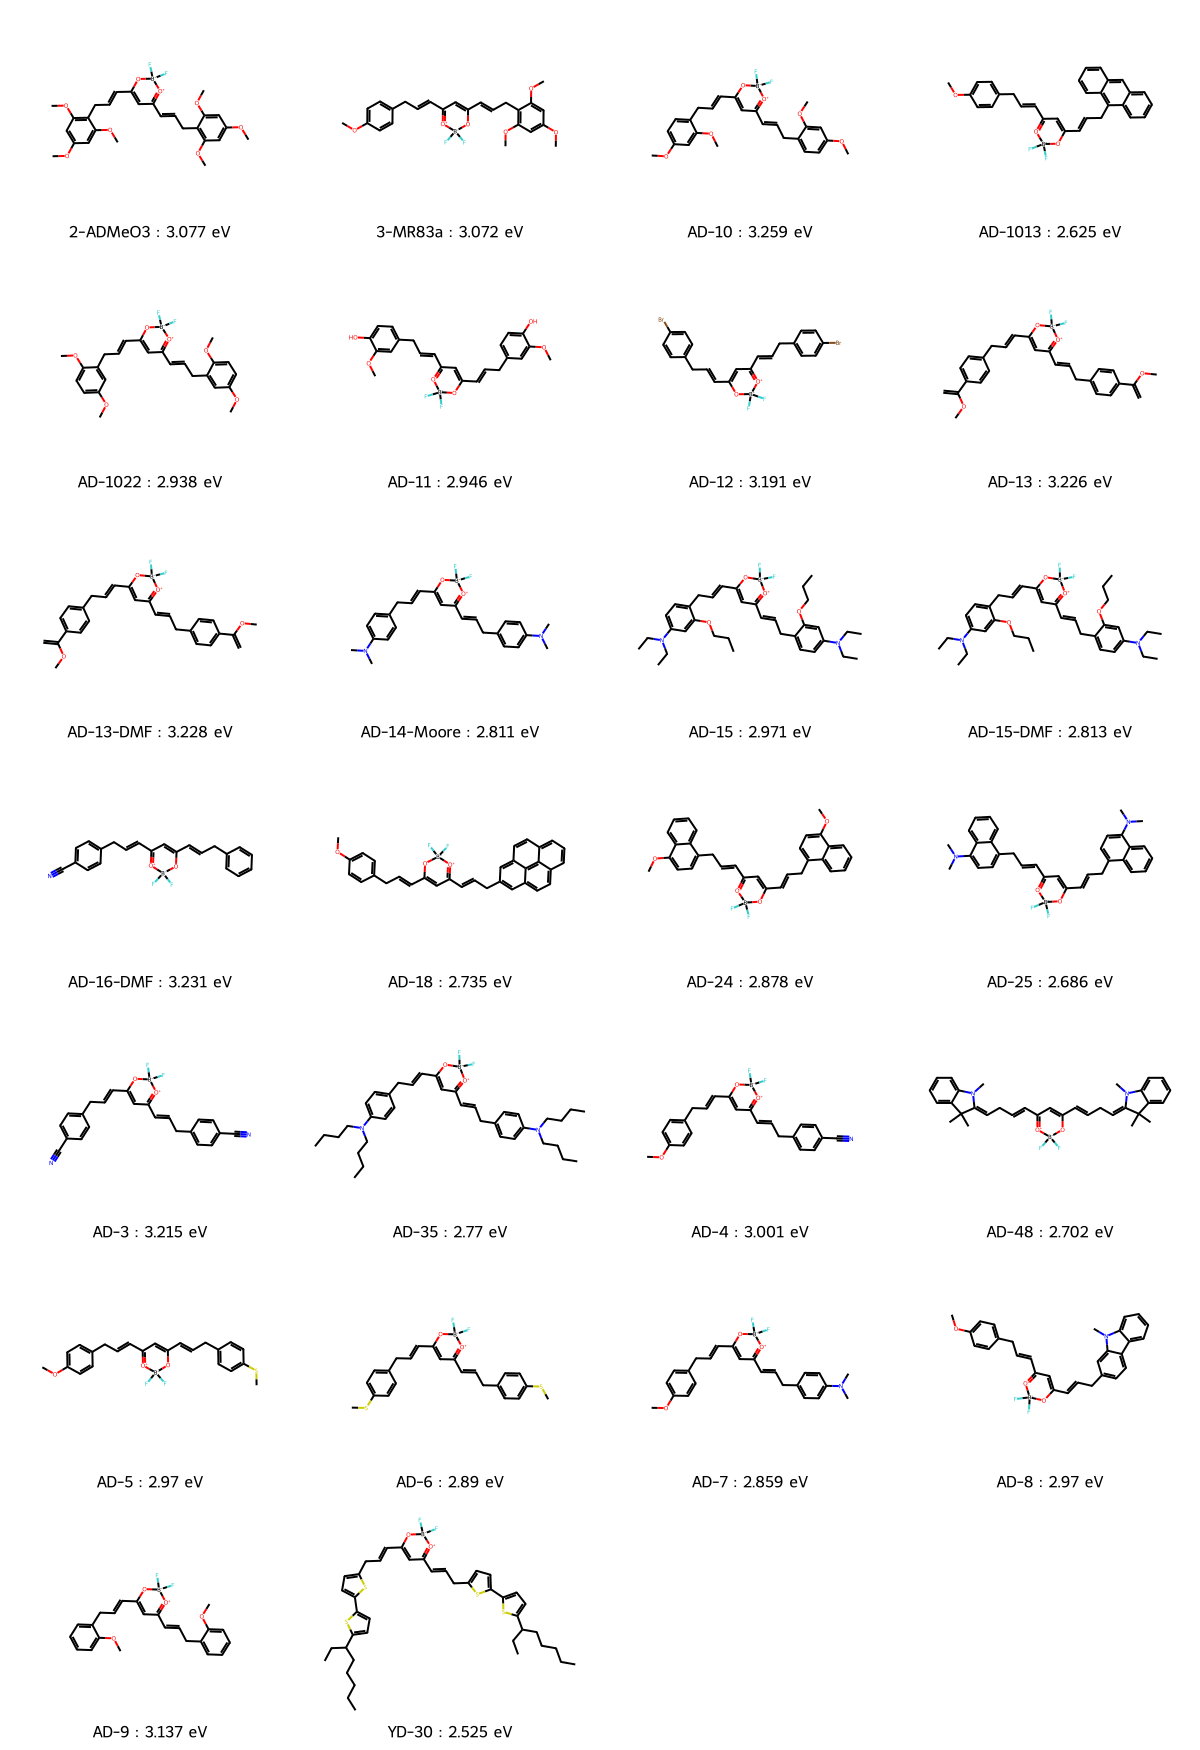

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors

cucumin_varients = (
    "COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1OC)=[O+][B-](F)(F)O2)c(OC)c3",
    "COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC)cc(OC)cc1OC)=C2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+][B-](F)(F)O2)c(OC)c3",
    "COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1ccccc1cc3ccccc23)=C4)cc5",
    "COc3ccc(OC)c(C/C=C/C2=CC(/C=C/Cc1cc(OC)ccc1OC)=[O+][B-](F)(F)O2)c3",
    "COc3cc(C/C=C/C2=CC(/C=C/Cc1ccc(O)c(OC)c1)=[O+][B-](F)(F)O2)ccc3O",
    "F[B-]3(F)OC(/C=C/Cc1ccc(Br)cc1)=CC(/C=C/Cc2ccc(Br)cc2)=[O+]3",
    "C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)cc1)=[O+][B-](F)(F)O2)cc3",
    "C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)cc1)=[O+][B-](F)(F)O2)cc3",
    "CN(C)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=[O+][B-](F)(F)O2)cc3",
    "CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N(CC)CC)cc2OCCC)=[O+][B-](F)(F)O3",
    "CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N(CC)CC)cc2OCCC)=[O+][B-](F)(F)O3",
    "N#Cc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccccc1)=C2)cc3",
    "COc6ccc(C/C=C/C5=CC(/C=C/Cc1cc2ccc3cccc4ccc(c1)c2c34)=[O+][B-](F)(F)O5)cc6",
    "COc4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(OC)c2ccccc12)=[O+][B-](F)(F)O3)c5ccccc45",
    "CN(C)c4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(N(C)C)c2ccccc12)=[O+][B-](F)(F)O3)c5ccccc45",
    "N#Cc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+][B-](F)(F)O2)cc3",
    "CCCCN(CCCC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(CCCC)CCCC)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+][B-](F)(F)O2)cc3",
    "CN5/C(=C\C\C=C\C3=CC(/C=C/C/C=C/2N(C)c1ccccc1C2(C)C)=[O+][B-](F)(F)O3)C(C)(C)c4ccccc45",
    "COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccc(SC)cc1)=C2)cc3",
    "CSc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(SC)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc3ccc2c1ccccc1n(C)c2c3)=C4)cc5",
    "COc1ccccc1C/C=C/C3=CC(/C=C/Cc2ccccc2OC)=[O+][B-](F)(F)O3",
    "CCCCCC(CC)c5ccc(c4ccc(C/C=C/C3=CC(/C=C/Cc2ccc(c1ccc(C(CC)CCCCC)s1)s2)=[O+][B-](F)(F)O3)s4)s5"
)

molecule_names = ['2-ADMeO3', '3-MR83a', 'AD-10', 'AD-1013', 'AD-1022', 'AD-11', 'AD-12', 'AD-13', 'AD-13-DMF', 'AD-14-Moore', 'AD-15', 'AD-15-DMF', 'AD-16-DMF', 'AD-18', 'AD-24', 'AD-25', 'AD-3', 'AD-35', 'AD-4', 'AD-48', 'AD-5', 'AD-6', 'AD-7', 'AD-8', 'AD-9', 'YD-30']
homo_lumo_gap = [3.077, 3.072, 3.259, 2.625, 2.938, 2.946, 3.191, 3.226, 3.228, 2.811, 2.971, 2.813, 3.231, 2.735, 2.878, 2.686, 3.215, 2.77, 3.001, 2.702, 2.97, 2.89, 2.859, 2.97, 3.137, 2.525]

molecules = [Chem.MolFromSmiles(smiles) for smiles in cucumin_varients]
mws = [round(Descriptors.MolWt(mol),3) for mol in molecules]
logp = [Descriptors.MolLogP(mol) for mol in molecules]
legends = [f"{name} : {gap} eV" for name, gap in zip(molecule_names, homo_lumo_gap)]
Draw.MolsToGridImage(molecules, molsPerRow=4, subImgSize=(300,250), legends=legends)

In [3]:
import pandas as pd
import numpy as np
from rdkit.Chem import AllChem

# Function to generate Morgan fingerprints
def generate_morgan_fingerprint(smiles, radius=4, n_bits=1024):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits, useChirality = True)
        return list(fingerprint)
    else:
        return None

data = {
    'Molecule': molecule_names,
    'Molecular Weight': mws,
    'LogP': logp,
    'Homo-Lumo Gap (eV)': homo_lumo_gap,
    'Smiles': cucumin_varients
}

cucumin_df = pd.DataFrame(data)

cucumin_df['Morgan_Fingerprint'] = cucumin_df['Smiles'].apply(generate_morgan_fingerprint)
fingerprint_df = pd.DataFrame(cucumin_df['Morgan_Fingerprint'].tolist(), columns=[f'morgan_{i}' for i in range(1024)])
cucumin_df_new = pd.concat([cucumin_df, fingerprint_df], axis=1)
cucumin_df_new.drop(columns=['Morgan_Fingerprint'], inplace=True)

<span style= "font-size: 20px; font-weight: medium; color: white">(RF) - DFT calculated molecule database training for ML prediction on cucumin varients</span>

- <span style= "font-size: 15px; font-weight: medium; color: white;">Machine Learning model to predict band gap of cucumin varients generated using morgan fingerprint. same def morgan_fingerprint used to generate test data.</span>

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/AjStephan/havard-smile-opv/main/Non-fullerene%20small-molecules%20acceptors.csv')
newdata = data.drop(columns=['index', 'inchikey',  'HOMO_calc', 'LUMO_calc', 'LUMO_calib',
       'LUMO_calib_stds', 'HOMO_calib', 'HOMO_calib_stds', 'molW',
       'PCE_calc', 'Voc_calc', 'Jsc_calc', 'FF_calc', 'EQE_calc',
       'PCE_calib', 'Voc_calib', 'Jsc_calib', 'FF_calib', 'EQE_calib',
       'PCE_cdiff', 'PCE_calib_plus'], axis=1)
newdata.head()

,smiles,GAP_calib,GAP_calc
0,CN1C(=O)C(=Cc2occc2C(=O)c2ccc(-c3ncc(C4=CC=CC5...,2.601647,3.109059
1,CN1C(=O)C(=CC2=CC=C(c3cnc(-c4ccc(C(=O)c5ccoc5)...,2.204408,2.634680
2,CN1C(=O)C(=Cc2ncc(-c3ccc(C(=O)c4cocc4C=Cc4ccnc...,2.374851,2.825687
3,CN1C(=O)C(=Cc2nccc(C=Cc3cocc3C(=O)c3ccc(-c4cnc...,2.887886,3.342626
4,CN1C(=O)C(=Cc2sc(C#N)c(-c3ncc(-c4ccsc4C(=O)c4c...,2.876440,3.304822


In [5]:
newdata['Morgan_Fingerprint'] = newdata['smiles'].apply(generate_morgan_fingerprint)
fingerprint_new = pd.DataFrame(newdata['Morgan_Fingerprint'].tolist(), columns=[f'morgan_{i}' for i in range (1024)])
newdata_fps = pd.concat([newdata, fingerprint_new], axis = 1)
newdata_fps.drop(columns = ['Morgan_Fingerprint'], inplace = True)
newdata_fps.head()

,smiles,GAP_calib,GAP_calc,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,...,morgan_1014,morgan_1015,morgan_1016,morgan_1017,morgan_1018,morgan_1019,morgan_1020,morgan_1021,morgan_1022,morgan_1023
0,CN1C(=O)C(=Cc2occc2C(=O)c2ccc(-c3ncc(C4=CC=CC5...,2.601647,3.109059,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,CN1C(=O)C(=CC2=CC=C(c3cnc(-c4ccc(C(=O)c5ccoc5)...,2.204408,2.634680,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,CN1C(=O)C(=Cc2ncc(-c3ccc(C(=O)c4cocc4C=Cc4ccnc...,2.374851,2.825687,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CN1C(=O)C(=Cc2nccc(C=Cc3cocc3C(=O)c3ccc(-c4cnc...,2.887886,3.342626,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CN1C(=O)C(=Cc2sc(C#N)c(-c3ncc(-c4ccsc4C(=O)c4c...,2.876440,3.304822,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [6]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51256 entries, 0 to 51255
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   smiles              51256 non-null  object 
 1   GAP_calib           51256 non-null  float64
 2   GAP_calc            51256 non-null  float64
 3   Morgan_Fingerprint  51256 non-null  object 
dtypes: float64(2), object(2)
memory usage: 1.6+ MB


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = fingerprint_new
y = newdata['GAP_calib']

reg1 = pd.concat([X,y], axis = 1)
X = reg1.drop('GAP_calib', axis=1)
y = reg1['GAP_calib']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor
rf = RandomForestRegressor(
    n_estimators=360, random_state=42, 
    n_jobs= -2, 
    max_depth=25, min_samples_split=4, min_samples_leaf=6
    )
rf.fit(X_train, y_train)

# Predict the target variable
y_pred = rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

Mean Squared Error: 0.05088036528193284
R^2: 0.8638927073832556


In [8]:
# Apply the Predicted the band gap of cucumin_varients to the dataframe
pred_cucumin = fingerprint_df
for x in (fingerprint_df):
  y_pred = rf.predict(pred_cucumin)

column_index = cucumin_df.columns.get_loc('Homo-Lumo Gap (eV)')
cucumin_df.insert(column_index + 1, 'RF Predicted Band Gap (eV)', y_pred)
cucumin_df.head()

,Molecule,Molecular Weight,LogP,Homo-Lumo Gap (eV),RF Predicted Band Gap (eV),Smiles,Morgan_Fingerprint
0,2-ADMeO3,532.345,5.0293,3.077,3.361973,COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,3-MR83a,472.293,5.0121,3.072,3.354827,COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC...,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,AD-10,472.293,5.0121,3.259,3.371295,COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+]...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
3,AD-1013,482.335,7.2927,2.625,3.317794,COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1cc...,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,AD-1022,472.293,5.0121,2.938,3.374336,COc3ccc(OC)c(C/C=C/C2=CC(/C=C/Cc1cc(OC)ccc1OC)...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


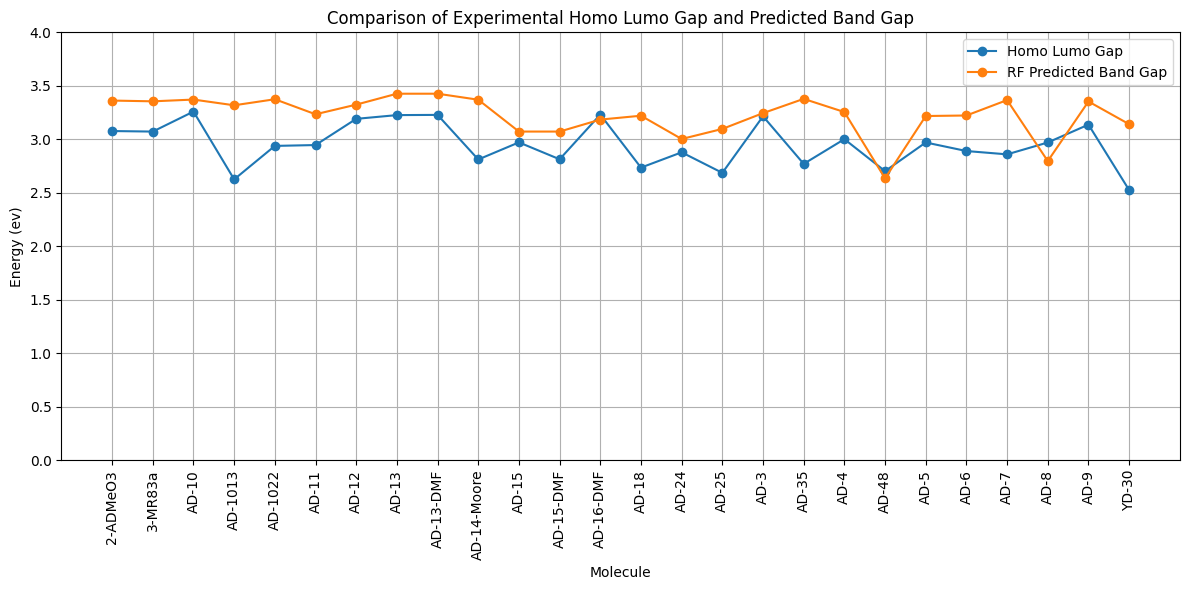

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(cucumin_df['Molecule'], cucumin_df['Homo-Lumo Gap (eV)'], marker='o', label='Homo Lumo Gap')
plt.plot(cucumin_df['Molecule'], cucumin_df['RF Predicted Band Gap (eV)'], marker='o', label='RF Predicted Band Gap')
plt.xlabel('Molecule')
plt.ylabel('Energy (ev)')
plt.title('Comparison of Experimental Homo Lumo Gap and Predicted Band Gap')
plt.xticks(rotation=90)
plt.ylim(0, 4)  # Set the y-axis range from 0 to 4
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<span style= "font-size: 20px; font-weight: medium; color: white">(NN) - DFT calculated molecule database training for ML prediction on cucumin varients</span>

- <span style= "font-size: 15px; font-weight: medium; color: white;">Neural Network model to predict band gap of cucumin varients generated using morgan fingerprint. same def morgan_fingerprint used to generate test data.</span>

In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd

X = fingerprint_new
y = newdata['GAP_calib']

reg1 = pd.concat([X, y], axis=1)
X = reg1.drop('GAP_calib', axis=1)
y = reg1['GAP_calib']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=0)
loss = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test)

# R2 Score function in TF
def r_squared(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
    r2 = 1 - tf.divide(residual, total)
    return r2

r2 = r_squared(y_test, y_pred)

# Evaluate R2 score
r2_value = r2.numpy()

print("Loss:", loss)
print("R2 Score:", r2_value)

401/401 [==============================] - 1s 1ms/step
Loss: 0.029982423409819603
R2 Score: -25561.442308315


In [12]:
pred_cucumin = fingerprint_df
for x in (fingerprint_df):
  y_pred = model.predict(pred_cucumin, verbose=False)

column_index = cucumin_df.columns.get_loc('RF Predicted Band Gap (eV)')
cucumin_df.insert(column_index + 1, 'NN Predicted Band Gap (eV)', y_pred)
cucumin_df.head()

,Molecule,Molecular Weight,LogP,Homo-Lumo Gap (eV),RF Predicted Band Gap (eV),NN Predicted Band Gap (eV),Smiles,Morgan_Fingerprint
0,2-ADMeO3,532.345,5.0293,3.077,3.361973,2.395812,COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,3-MR83a,472.293,5.0121,3.072,3.354827,2.500772,COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC...,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,AD-10,472.293,5.0121,3.259,3.371295,2.419824,COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+]...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
3,AD-1013,482.335,7.2927,2.625,3.317794,2.235425,COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1cc...,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,AD-1022,472.293,5.0121,2.938,3.374336,2.597106,COc3ccc(OC)c(C/C=C/C2=CC(/C=C/Cc1cc(OC)ccc1OC)...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


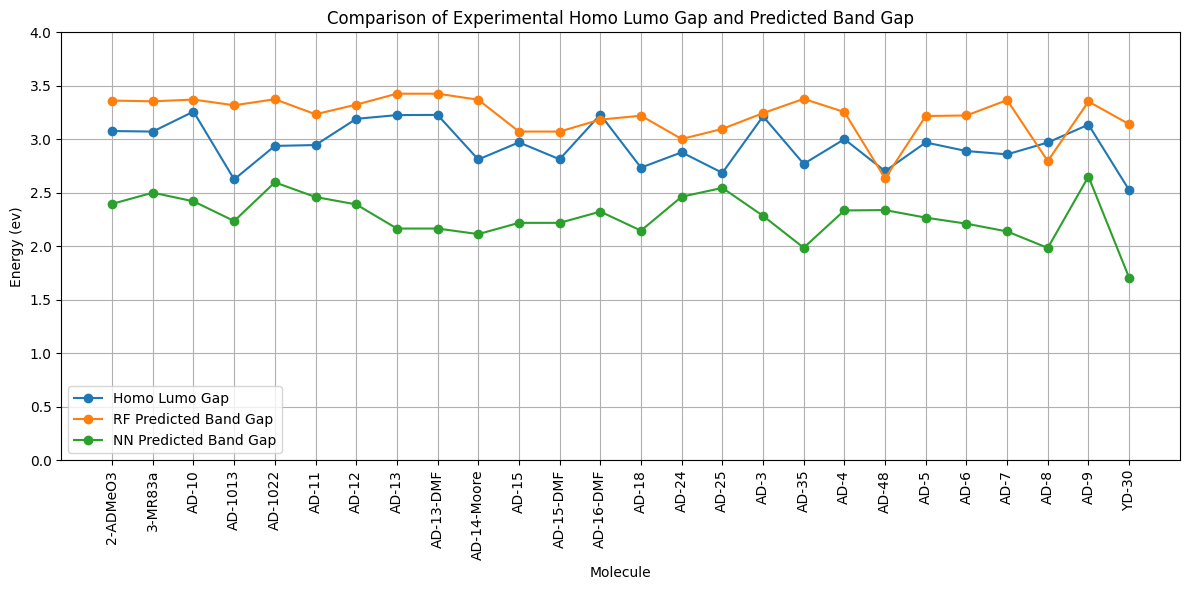

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(cucumin_df['Molecule'], cucumin_df['Homo-Lumo Gap (eV)'], marker='o', label='Homo Lumo Gap')
plt.plot(cucumin_df['Molecule'], cucumin_df['RF Predicted Band Gap (eV)'], marker='o', label='RF Predicted Band Gap')
plt.plot(cucumin_df['Molecule'], cucumin_df['NN Predicted Band Gap (eV)'], marker='o', label='NN Predicted Band Gap')
plt.xlabel('Molecule')
plt.ylabel('Energy (ev)')
plt.title('Comparison of Experimental Homo Lumo Gap and Predicted Band Gap')
plt.xticks(rotation=90)
plt.ylim(0,4)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()